In [86]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
df=pd.read_csv("dataset/f1_dnf.csv")

In [88]:
df.head()

,resultId,raceId,year,round,grid,positionOrder,points,laps,milliseconds,fastestLap,...,circuitRef,circuitId,name_y,location,country,lat,lng,alt,date,target_finish
0,2460,136,2002,13,11,4,3.0,77.0,NaN,\N,...,hungaroring,11,McLaren,Budapest,Hungary,47.5789,19.24860,264,2002-08-18,1
1,11565,483,1981,1,23,21,0.0,16.0,\N,\N,...,long_beach,43,McLaren,California,USA,33.7651,-118.18900,12,1981-03-15,0
2,18661,772,1958,8,0,26,0.0,0.0,\N,\N,...,nurburgring,20,Maserati,Nürburg,Germany,50.3356,6.94750,578,1958-08-03,0
3,25121,1058,2021,8,19,16,0.0,69.0,\N,57,...,red_bull_ring,70,Haas F1 Team,Spielberg,Austria,47.2197,14.76470,678,2021-06-27,0
4,8863,383,1988,12,0,30,0.0,0.0,\N,\N,...,monza,14,Euro Brun,Monza,Italy,45.6156,9.28111,162,1988-09-11,0


In [89]:
df.replace(r"\N", np.nan, inplace=True)

In [90]:
df.describe()

,resultId,raceId,year,round,grid,positionOrder,points,laps,circuitId,lat,lng,alt,target_finish
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9029.000000,9022.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,13440.56840,554.444500,1991.466600,8.540100,11.176200,12.681000,2.034460,46.759033,23.972500,34.013439,5.067721,281.465900,0.289500
std,7750.91677,314.184815,20.060237,5.085487,7.241008,7.635448,4.469553,29.840206,19.233599,25.167968,57.938131,414.586363,0.453553
min,9.00000,1.000000,1950.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-37.849700,-118.189000,-7.000000,0.000000
25%,6637.75000,300.000000,1977.000000,4.000000,5.000000,6.000000,0.000000,23.250000,9.000000,34.843100,-2.940560,18.000000,0.000000
50%,13428.50000,532.000000,1991.000000,8.000000,11.000000,12.000000,0.000000,53.000000,18.000000,43.734700,5.971390,153.000000,0.000000
75%,20159.25000,815.250000,2009.000000,12.000000,17.000000,18.000000,2.000000,67.000000,34.000000,49.254200,14.764700,401.000000,1.000000
max,26761.00000,1144.000000,2024.000000,24.000000,34.000000,39.000000,36.000000,200.000000,80.000000,57.265300,144.968000,2227.000000,1.000000


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         10000 non-null  int64  
 1   raceId           10000 non-null  int64  
 2   year             10000 non-null  int64  
 3   round            10000 non-null  int64  
 4   grid             10000 non-null  int64  
 5   positionOrder    10000 non-null  int64  
 6   points           9029 non-null   float64
 7   laps             9022 non-null   float64
 8   milliseconds     2607 non-null   object 
 9   fastestLap       3105 non-null   object 
 10  rank             3202 non-null   object 
 11  fastestLapTime   3105 non-null   object 
 12  fastestLapSpeed  2809 non-null   object 
 13  driverRef        10000 non-null  object 
 14  surname          10000 non-null  object 
 15  forename         10000 non-null  object 
 16  dob              10000 non-null  object 
 17  nationality_x

# Cleaning and Preprocessing

### Handling Missing Values

In [92]:
df_dropped=df.drop(columns=['rank', 'fastestLap'])

In [93]:
milli_col_actual_missing= df_dropped[(df_dropped['target_finish'] == 1) & (df_dropped['milliseconds'].isna())]
print(len(milli_col_actual_missing))
print(f"Percentof actual missing {(len(milli_col_actual_missing)/10000)*100}")

290
Percentof actual missing 2.9000000000000004


In [94]:
count = ((df_dropped['laps'] == 0) & (df_dropped['fastestLapSpeed'].isna())).sum()
print("Number of laps = 0 with fastestLapSpeed NaN:", count)


Number of laps = 0 with fastestLapSpeed NaN: 814


In [95]:
count = ((df_dropped['laps'] == 0) & (df_dropped['fastestLapSpeed'].isna())).sum()
print("Number of laps = 0 with fastestLapSpeed NaN:", count)

Number of laps = 0 with fastestLapSpeed NaN: 814


In [96]:
df_dropped.loc[(df_dropped['target_finish'] == 0) & (df_dropped['milliseconds'].isna()), 'milliseconds'] = 0

In [97]:
df_dropped.loc[(df_dropped['laps'] == 0) & (df_dropped['fastestLapTime'].isna()), 'fastestLapTime'] = 0
df_dropped.loc[(df_dropped['laps'] == 0) & (df_dropped['fastestLapSpeed'].isna()), 'fastestLapSpeed'] = 0

In [98]:
df_dropped['points'] = df_dropped.apply(
    lambda row: 0 if row['positionOrder'] > 10 else row['points'],
    axis=1
)

In [99]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         10000 non-null  int64  
 1   raceId           10000 non-null  int64  
 2   year             10000 non-null  int64  
 3   round            10000 non-null  int64  
 4   grid             10000 non-null  int64  
 5   positionOrder    10000 non-null  int64  
 6   points           9586 non-null   float64
 7   laps             9022 non-null   float64
 8   milliseconds     9710 non-null   object 
 9   fastestLapTime   3919 non-null   object 
 10  fastestLapSpeed  3623 non-null   object 
 11  driverRef        10000 non-null  object 
 12  surname          10000 non-null  object 
 13  forename         10000 non-null  object 
 14  dob              10000 non-null  object 
 15  nationality_x    10000 non-null  object 
 16  constructorRef   10000 non-null  object 
 17  name         

### Handling ambigous values

Detecting ambigous values in grid and position column

In [100]:
grid_above_20 = (df['grid'] > 34).sum()
position_above_26 = (df['positionOrder'] > 39).sum()

print("Grid positions > 34:", grid_above_20)
print("Position orders > 39:", position_above_26)

Grid positions > 34: 0
Position orders > 39: 0


In [101]:
laps_count=df['laps'].value_counts().sort_values(axis=0,ascending=False)
laps_count.sort_values().head()

laps
185.0    1
103.0    1
189.0    1
110.0    1
122.0    1
Name: count, dtype: int64

Detecting ambigous values in Milliseconds column

In [102]:
def lap_to_milliseconds(lap_str):
    try:
        if lap_str == 0:
            return 0
        minutes, seconds = lap_str.split(":")
        return int(minutes)*60000 + float(seconds)*1000
    except:
        return None

df_dropped['fastestLapTime_ms'] = df_dropped['fastestLapTime'].apply(lap_to_milliseconds)
df_dropped['fastestLapSpeed']=pd.to_numeric(df_dropped['fastestLapSpeed'], errors='coerce')

In [103]:
df_not_finished= df[df['target_finish'] == 0]
df_finished= df[df['target_finish'] == 1]
df_not_finished = df_not_finished.reset_index(drop=True)
df_finished = df_finished.reset_index(drop=True)
print(df_not_finished.info())
print(df_finished.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         7105 non-null   int64  
 1   raceId           7105 non-null   int64  
 2   year             7105 non-null   int64  
 3   round            7105 non-null   int64  
 4   grid             7105 non-null   int64  
 5   positionOrder    7105 non-null   int64  
 6   points           6417 non-null   float64
 7   laps             6421 non-null   float64
 8   milliseconds     2 non-null      object 
 9   fastestLap       1506 non-null   object 
 10  rank             1590 non-null   object 
 11  fastestLapTime   1506 non-null   object 
 12  fastestLapSpeed  1357 non-null   object 
 13  driverRef        7105 non-null   object 
 14  surname          7105 non-null   object 
 15  forename         7105 non-null   object 
 16  dob              7105 non-null   object 
 17  nationality_x 

In [104]:
df_dropped['milliseconds']=pd.to_numeric(df_dropped['milliseconds'], errors='coerce')
df_dnf_with_time = df_dropped[(df_dropped['target_finish'] == 0) & (df_dropped['milliseconds'].notna()) & (df_dropped['milliseconds'] > 0)]
print(df_dnf_with_time[['date','driverRef', 'milliseconds', 'laps', 'raceId','target_finish']])


            date driverRef  milliseconds  laps  raceId  target_finish
1222  2005-04-24    button     5272321.0  62.0      74              0
3212  2005-04-24      sato     5296621.0  62.0      74              0


In [105]:
df_dropped.loc[
    (df_dropped['target_finish'] == 0) & (df_dropped['milliseconds'] > 0),
    'milliseconds'
] = 0


In [106]:
df_dnf_with_time = df_dropped[(df_dropped['target_finish'] == 0) & (df_dropped['milliseconds'].notna()) & (df_dropped['milliseconds'] > 0)]
print(df_dnf_with_time[['date','driverRef', 'milliseconds', 'laps', 'raceId','target_finish']])


Empty DataFrame
Columns: [date, driverRef, milliseconds, laps, raceId, target_finish]
Index: []


In [107]:
import pandas as pd

df_dropped['dob'] = pd.to_datetime(df_dropped['dob'], format='%Y-%m-%d')
df_dropped['birth_year'] = df_dropped['dob'].dt.year
df_dropped['age']=df_dropped['year']-df_dropped['birth_year']


# Feature Analysis

## Grid vs dnf

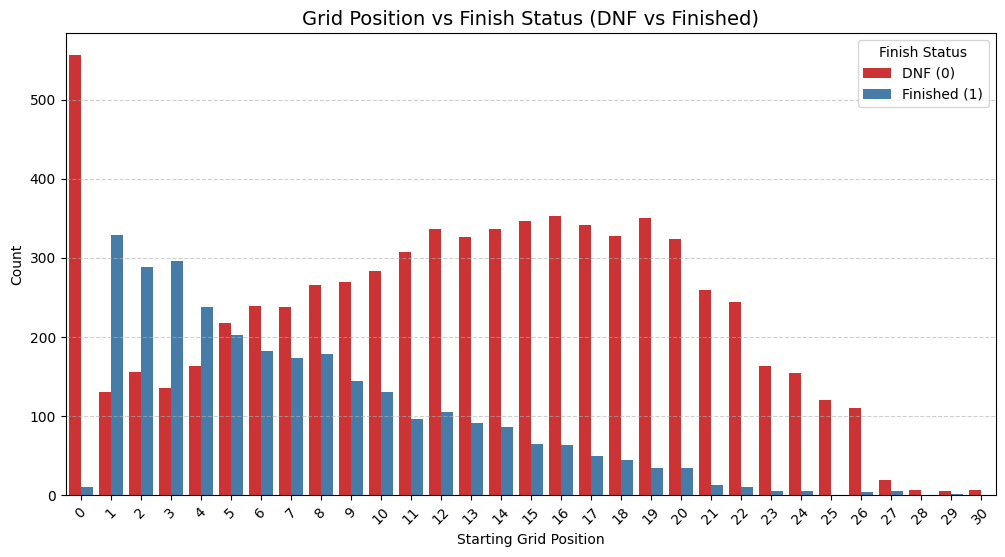

In [108]:
filtered_df = df_dropped[df_dropped['grid'] <= 30]

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x='grid', hue='target_finish', palette='Set1')

plt.title('Grid Position vs Finish Status (DNF vs Finished)', fontsize=14)
plt.xlabel('Starting Grid Position')
plt.ylabel('Count')
plt.legend(title='Finish Status', labels=['DNF (0)', 'Finished (1)'])
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

The 'Grid Position vs DNF/Finish' plot displays noticeable unevenness, with a fluctuating pattern across starting positions. This suggests that the driver’s starting grid position has a measurable impact on race completion outcomes. Certain positions consistently show higher DNF rates, potentially due to race dynamics or car performance differences.

## Top 20 Circuits - DNFs vs Finishes

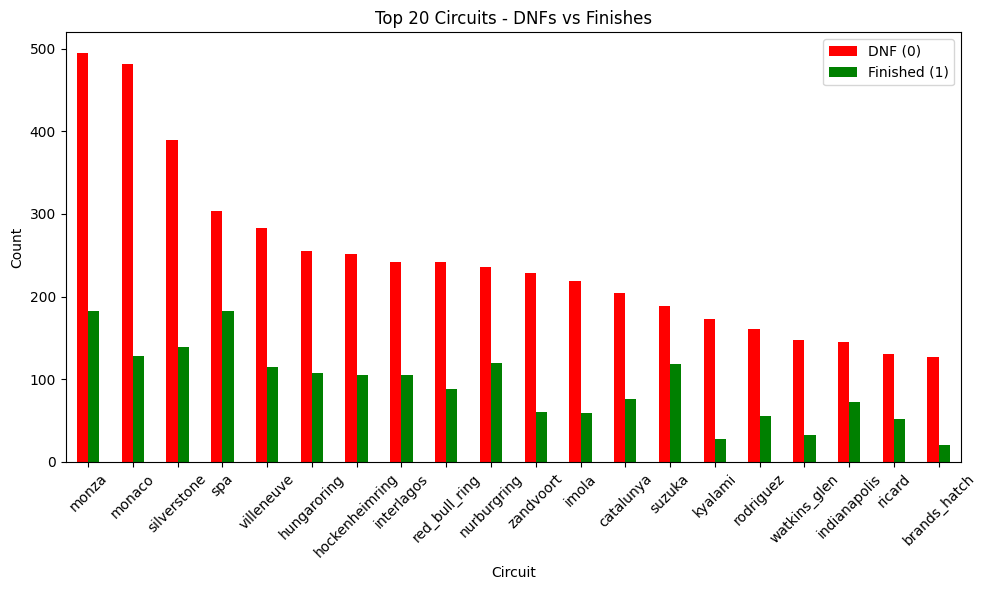

In [109]:
circuit_finish_counts = df.groupby(['circuitRef', 'target_finish']).size().unstack(fill_value=0)

top_dnf_circuits = circuit_finish_counts.sort_values(by=0, ascending=False).head(20)

top_dnf_circuits.plot(kind='bar', figsize=(10,6), color=['red', 'green'])
plt.title("Top 20 Circuits - DNFs vs Finishes")
plt.xlabel("Circuit")
plt.ylabel("Count")
plt.legend(["DNF (0)", "Finished (1)"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The 'Circuit ID vs DNF/Finish' plot reveals slight unevenness across different circuits, suggesting that track-specific factors (such as layout difficulty or weather tendencies) might influence DNFs to some extent.
However, the lack of a clear or consistent pattern indicates that circuitId does not have a strong direct relationship with race completion outcomes.

## Top 25 Drivers - DNFs vs Finishes

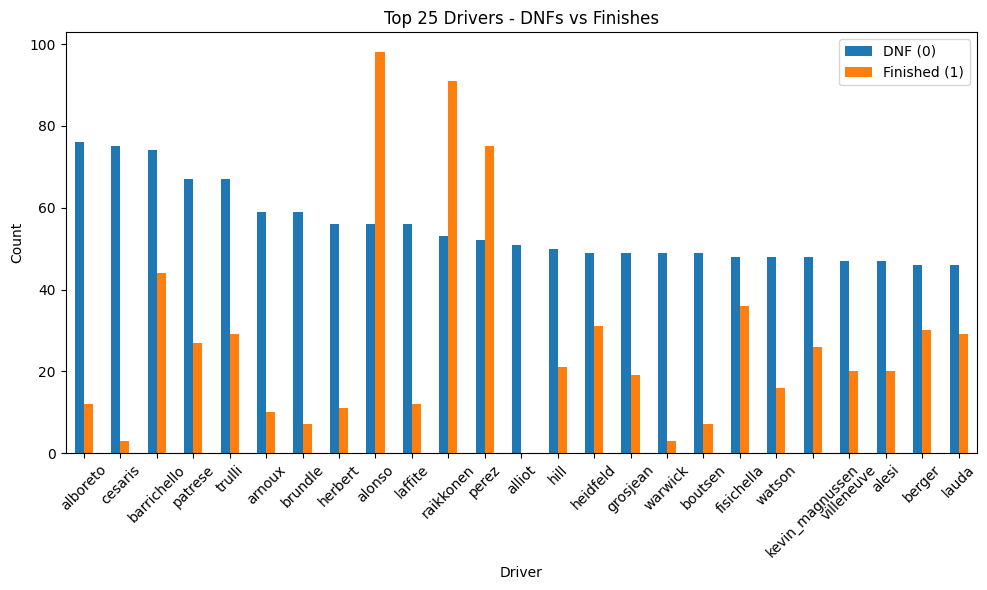

In [110]:
driver_finish_counts = df_dropped.groupby(['driverRef', 'target_finish']).size().unstack(fill_value=0)

top_dnf_drivers = driver_finish_counts.sort_values(by=0, ascending=False).head(25)

top_dnf_drivers.plot(kind='bar', figsize=(10,6))
plt.title("Top 25 Drivers - DNFs vs Finishes")
plt.xlabel("Driver")
plt.ylabel("Count")
plt.legend(["DNF (0)", "Finished (1)"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The 'Driver vs DNF/Finish' plot shows no continuous pattern but clear disparities among drivers — some have consistently high DNF counts while others rarely fail to finish. This indicates that driverRef carries strong predictive value, as individual driver performance and consistency significantly influence race completion outcomes.

Top 20 Teams - DNFs vs Finishes

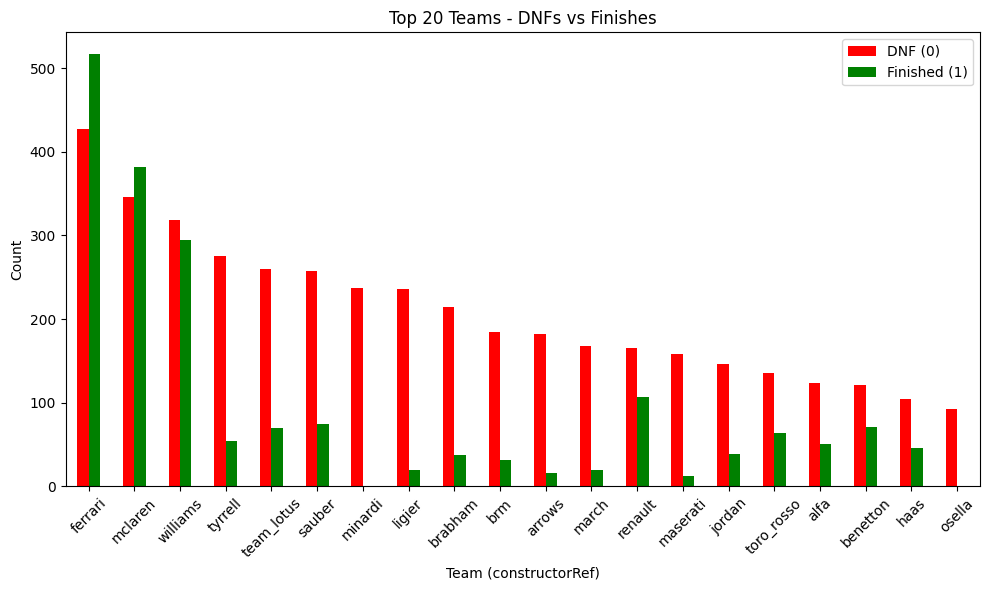

In [111]:
team_finish_counts = df.groupby(['constructorRef', 'target_finish']).size().unstack(fill_value=0)

top_dnf_teams = team_finish_counts.sort_values(by=0, ascending=False).head(20)

top_dnf_teams.plot(kind='bar', figsize=(10,6), color=['red', 'green'])
plt.title("Top 20 Teams - DNFs vs Finishes")
plt.xlabel("Team (constructorRef)")
plt.ylabel("Count")
plt.legend(["DNF (0)", "Finished (1)"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The 'Constructor vs DNF/Finish' plot shows uneven variation across different teams, similar to the grid position plot. This suggests that while some constructors have slightly higher DNF rates than others, there is no strong or consistent pattern, implying that constructorRef may have limited standalone predictive power but could still contribute value when combined with other features like driver or circuit.

## Top 45-DNFs vs Finishes per Year

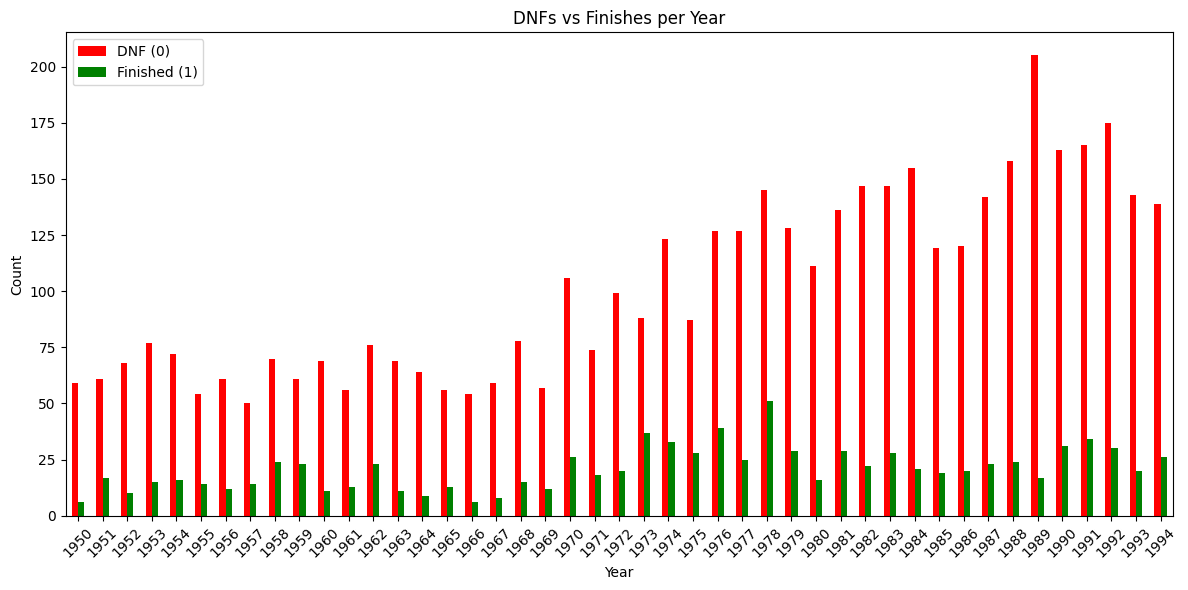

In [112]:
year_finish_counts = df.groupby(['year', 'target_finish']).size().unstack(fill_value=0)

year_finish_counts_sorted = year_finish_counts.sort_index().head(45)

year_finish_counts_sorted.plot(kind='bar', figsize=(12,6), color=['red', 'green'])
plt.title("DNFs vs Finishes per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(["DNF (0)", "Finished (1)"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The “Year vs DNF/Finish” plot shows a general increasing trend in DNFs over time, indicating that more recent seasons have experienced higher DNF rates. This suggests that year could be a relevant feature for the model, as it captures temporal changes in reliability, regulations, or race conditions that affect the likelihood of a driver finishing the race.

## Heat Map for correlating features and looking for a relevant feature

<Axes: >

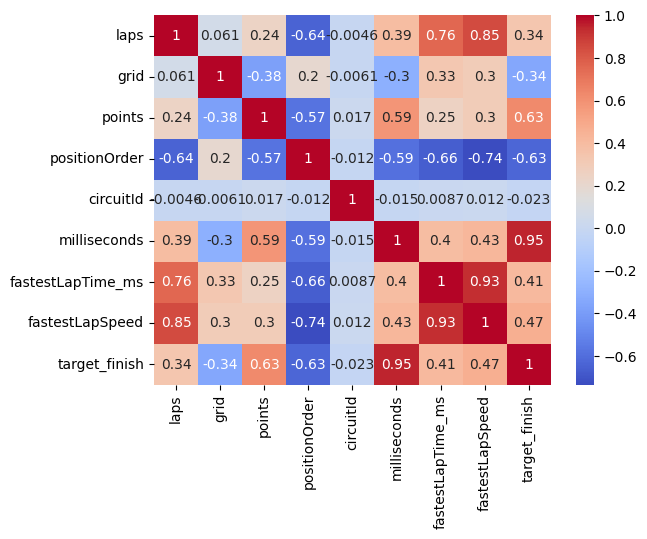

In [113]:
corr = df_dropped[['laps','grid','points','positionOrder','circuitId','milliseconds','fastestLapTime_ms','fastestLapSpeed','target_finish']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

## DNFs vs Finish by Grid for Top Circuits

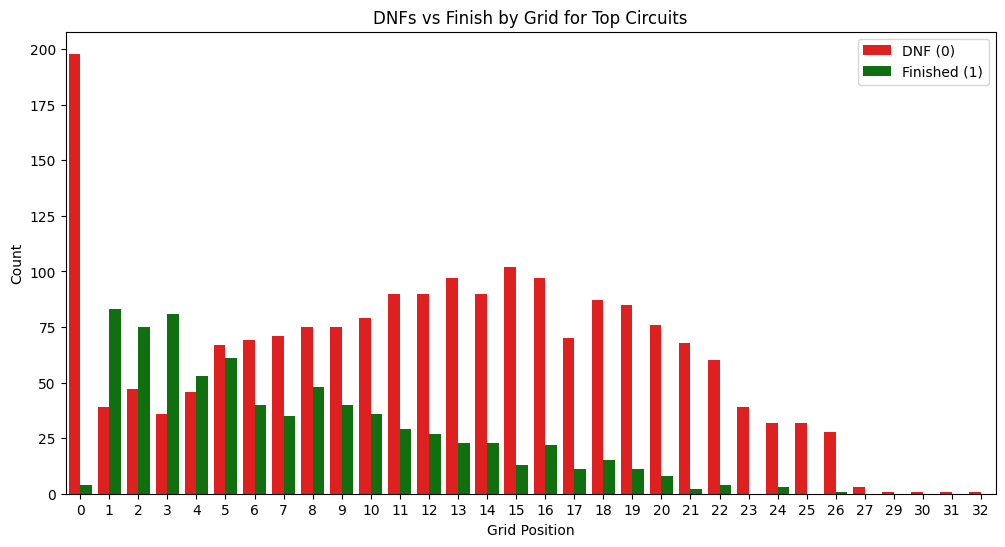

In [114]:
top_circuits = df_dropped[df_dropped['target_finish']==0]['circuitRef'].value_counts().head(5).index

subset = df_dropped[df_dropped['circuitRef'].isin(top_circuits)]

plt.figure(figsize=(12,6))
sns.countplot(
    x='grid',
    hue='target_finish',
    data=subset,
    palette={0:'red', 1:'green'}
)
plt.title("DNFs vs Finish by Grid for Top Circuits")
plt.xlabel("Grid Position")
plt.ylabel("Count")
plt.legend(["DNF (0)", "Finished (1)"])
plt.show()


## Laps vs Fastest Lap Speed (DNF vs Finished)

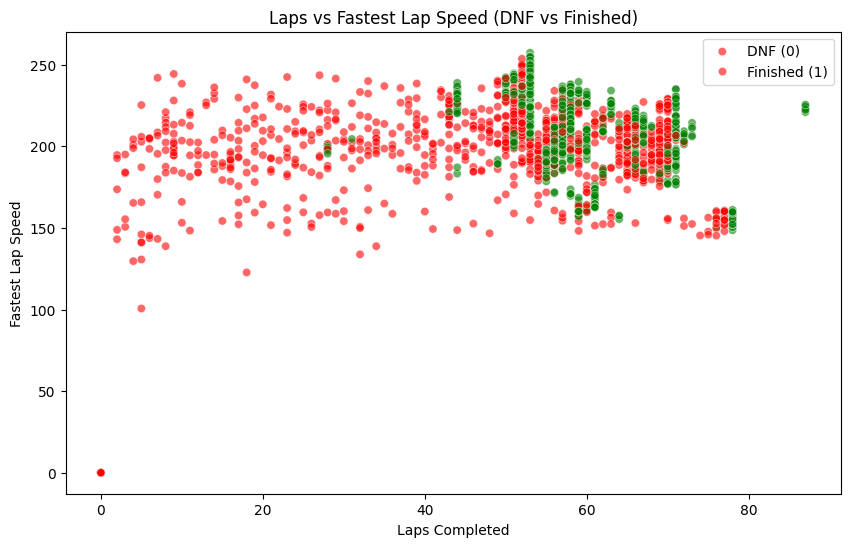

In [115]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='laps',
    y='fastestLapSpeed',
    hue='target_finish',
    data=df_dropped,
    palette={0:'red', 1:'green'},
    alpha=0.6
)
plt.title("Laps vs Fastest Lap Speed (DNF vs Finished)")
plt.xlabel("Laps Completed")
plt.ylabel("Fastest Lap Speed")
plt.legend(["DNF (0)", "Finished (1)"])
plt.show()


## Laps vs Fastest Lap Time (DNF vs Finished)

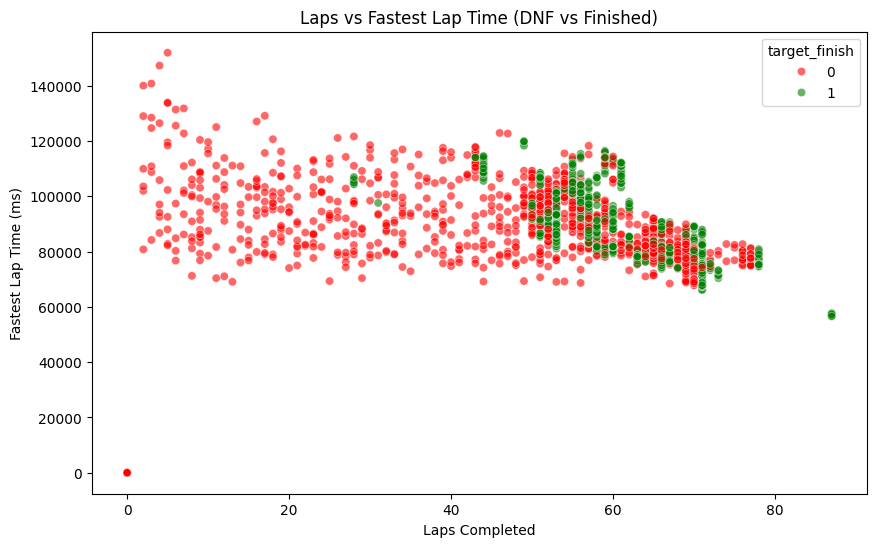

In [116]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='laps',
    y='fastestLapTime_ms',
    hue='target_finish',
    data=df_dropped,
    palette={0:'red', 1:'green'},
    alpha=0.6
)
plt.title("Laps vs Fastest Lap Time (DNF vs Finished)")
plt.xlabel("Laps Completed")
plt.ylabel("Fastest Lap Time (ms)")
plt.show()


## Count of DNFs vs Finished for Each Points Value

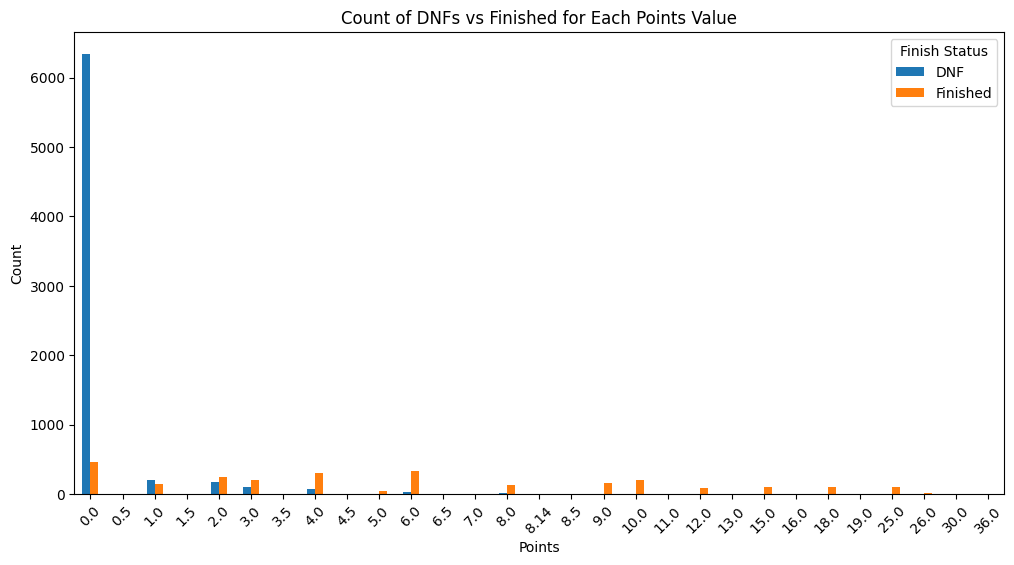

In [117]:
points_counts = df_dropped.groupby(['points', 'target_finish']).size().unstack(fill_value=0)

points_counts.plot(kind='bar', figsize=(12,6))
plt.xlabel("Points")
plt.ylabel("Count")
plt.title("Count of DNFs vs Finished for Each Points Value")
plt.xticks(rotation=45)
plt.legend(['DNF', 'Finished'], title='Finish Status')
plt.show()

The points feature shows extremely high DNF rates for a value of 0, while all other values correspond to finished races. This is a strong indication of potential data leakage, as points is likely determined based on whether a driver finished or not. Including this feature in the model would artificially inflate performance and should be excluded from training.

## Distribution of Fastest Lap Time (ms) and Fastest Lap Speed for DNF Racers

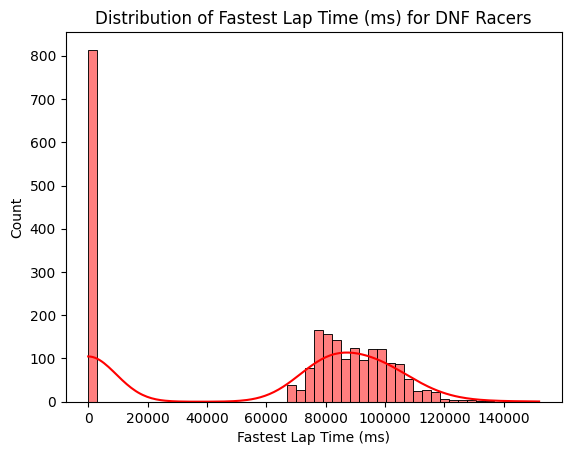

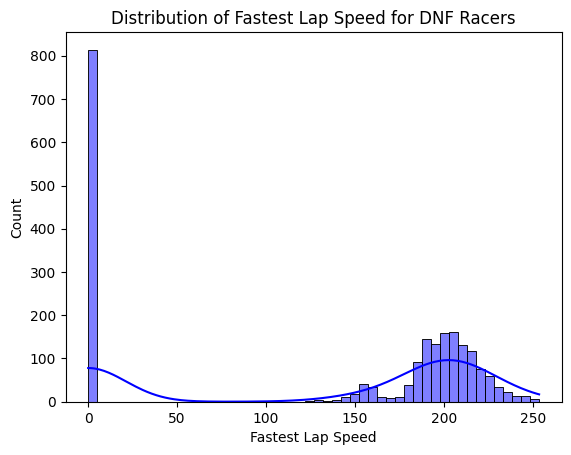

In [118]:
df_dnf = df_dropped[df_dropped['target_finish'] == 0]

sns.histplot(df_dnf['fastestLapTime_ms'], bins=50, kde=True, color='red')
plt.title("Distribution of Fastest Lap Time (ms) for DNF Racers")
plt.xlabel("Fastest Lap Time (ms)")
plt.show()

sns.histplot(df_dnf['fastestLapSpeed'], bins=50, kde=True, color='blue')
plt.title("Distribution of Fastest Lap Speed for DNF Racers")
plt.xlabel("Fastest Lap Speed")
plt.show()


## Scatter plot for Latitudes and Longitudes

In [119]:
df_dropped[['lat', 'lng']].drop_duplicates().shape[0]


77

<Axes: xlabel='lng', ylabel='lat'>

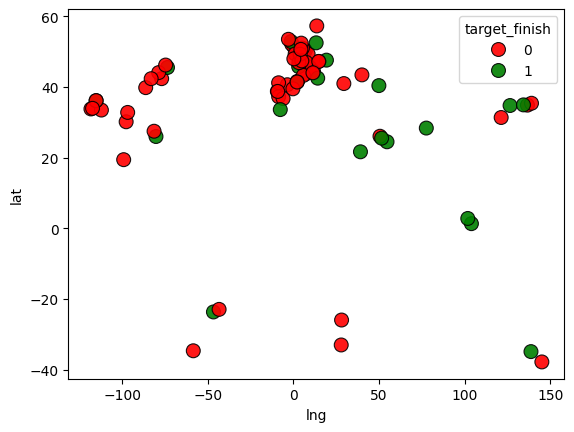

In [120]:
unique_circuits = df_dropped.drop_duplicates(subset=['lat', 'lng'])

sns.scatterplot(
    x='lng', y='lat',
    hue='target_finish',
    data=unique_circuits,
    palette={0: 'red', 1: 'green'},
    alpha=0.9,
    s=100, 
    edgecolor='black'
)


### Converting to Dataset to be used in model training

In [121]:
df_dropped.to_csv("Proc_f1_data.csv",index=False)